# 07wk-027: 아이스크림(이상치), 회귀분석

최규빈  
2023-10-05

# 1. 강의영상

# 2. Imports

In [155]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt

# 3. Data

In [251]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 200
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

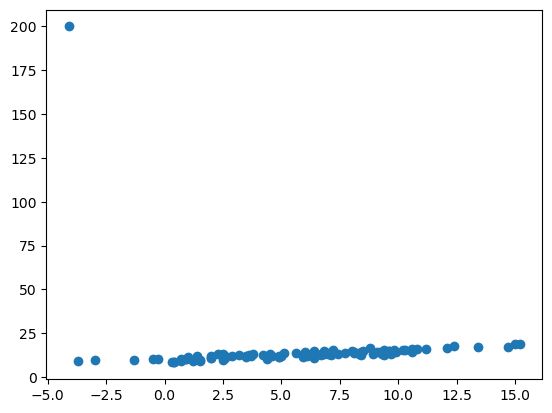

In [252]:
plt.plot(df_train.temp,df_train.ice_sales,'o')

# 4. 분석

`-` 선형회귀로 적합

In [255]:
# step1
X = df_train[['temp']]
y = df_train['ice_sales']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3 
predictr.fit(X,y)
# step4 
df_train['ice_sales_hat'] = predictr.predict(X)

`-` 시각화

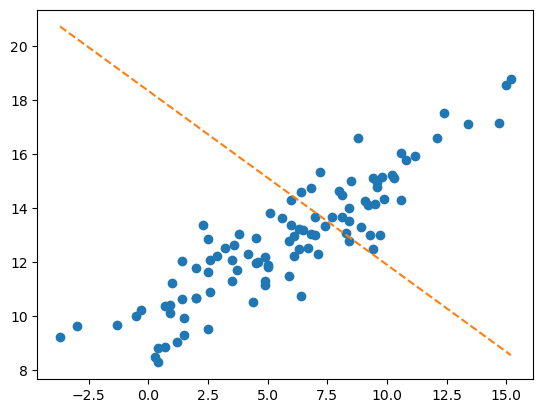

In [258]:
# plt.plot(df_train.temp,df_train.ice_sales,'o')
# plt.plot(df_train.temp,df_train.ice_sales_hat,'--')
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o')
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--')

-   모형이 너무 깨지는데?..

`-` 새로운 unseen data를 가정, 데이터는 12.5~18 에 걸쳐있다고 가정한다.

In [262]:
XX = df_test = pd.DataFrame({'temp':np.linspace(12.5,18,100)})
df_test['ice_sales_hat'] = predictr.predict(XX)

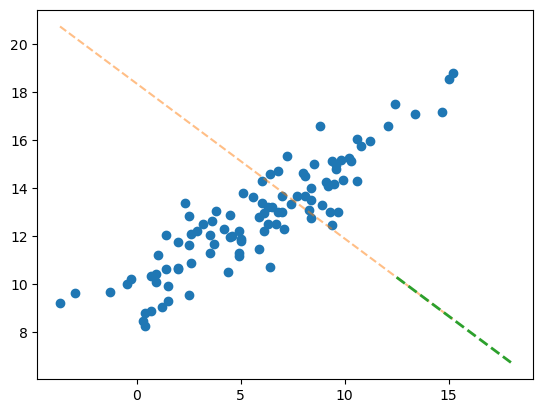

In [263]:
plt.plot(df.temp[1:],df.ice_sales[1:],'o',color='C0')
plt.plot(df.temp[1:],df.ice_sales_hat[1:],'--',color='C1',alpha=0.5)
plt.plot(df_test.temp,df_test.ice_sales_hat,'--',color='C2',linewidth=2)

-   더운데 아이스크림 판매량이 줄어들어? (더 더우면 판매량이 음수
    나오겠는데?)
-   저정도의 아웃라이어면 모형을 빼야하나? (그런데 저런것도 데이터의
    가치가 있으면 어쩌지? 데이터의 가치가 있는지 없는지는 어떻게
    판단하지?)

# 5. Discussion

`-` 딱히 정답이 없음..